In [ ]:
"""# Sentiment Analysis of Movie Reviews

This notebook demonstrates how to classify movie reviews as positive or negative using sentiment analysis.

## 1. Setup

**1.1 Install Required Libraries**
"""
!pip install pandas numpy scikit-learn matplotlib seaborn nltk wordcloud

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Check for missing values
df.isnull().sum()

# Check the distribution of sentiment labels
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8894666666666666
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



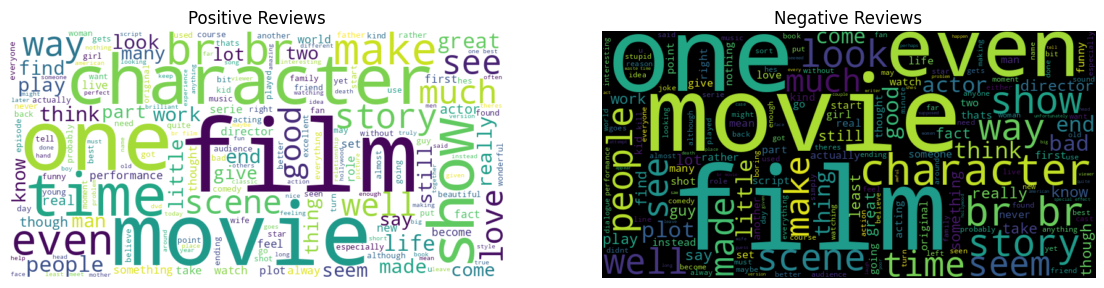

In [ ]:
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()

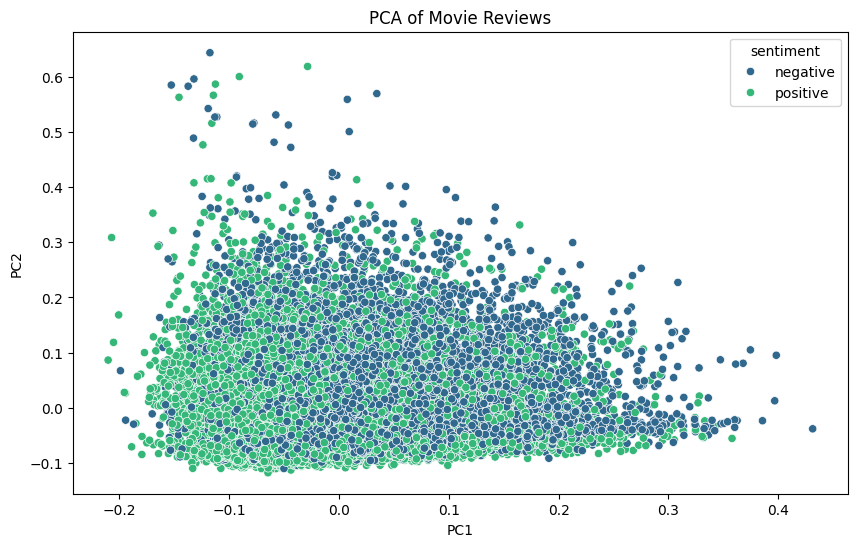

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_vec.toarray())

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['sentiment'] = y_train.reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sentiment', palette='viridis')
plt.title('PCA of Movie Reviews')
plt.show()